# Heart Disease Prediction using Neural Networks
This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.



We will be using some common Python libraries, such as pandas, numpy, and matplotlib. Furthermore, for the machine learning side of this project, we will be using sklearn and keras. Import these libraries using the cell below to ensure you have them correctly installed.

In [400]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.4.2
Numpy: 1.21.5
Sklearn: 1.1.2
Matplotlib: 3.5.1
Keras: 2.9.0


In [401]:
df=pd.read_csv(r"C:\Users\v.tsouvalakis\Desktop\ML_DATASETS\heart.csv")

In [402]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [403]:
# print the last twenty or so data points
df.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [404]:
##Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [405]:
df = df[~df.isin(['?'])]


In [406]:
##Drop nan values
df.dropna(axis=0,inplace=True)

In [407]:
# print the shape and data type of the dataframe
print(df.shape)
print(df.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [408]:
# print data characteristics, usings pandas built-in describe() function
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


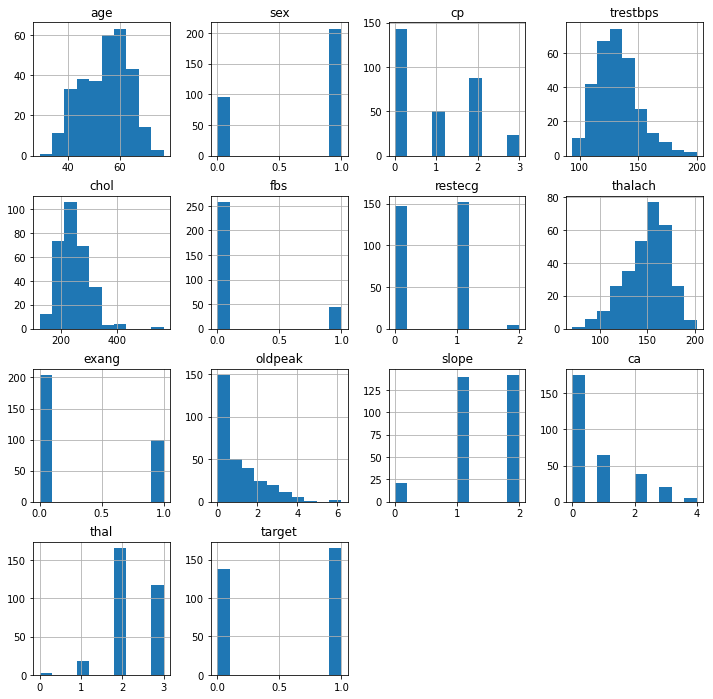

In [409]:
##Plot histograms for each variable
df.hist(figsize=(12,12))
plt.show()

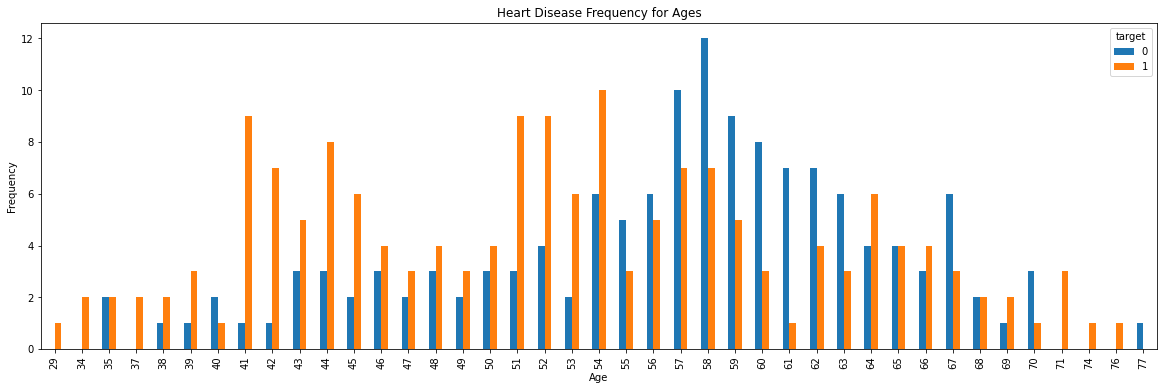

In [410]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

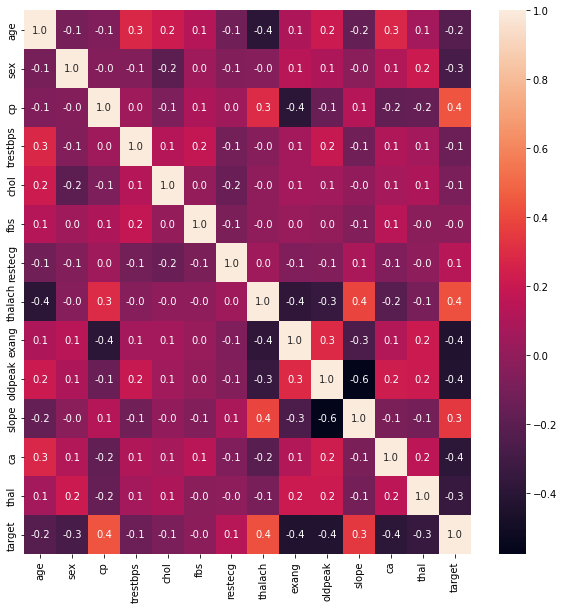

In [411]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')

# 2.Create Training and Testing Datasets
Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [412]:
x = df.drop('target',axis=1).values
y = df['target'].values

In [413]:
x[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [414]:
# create X and Y datasets for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [416]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [417]:
x_train[0]

array([ 1.61047991, -1.46385011,  2.04442042,  0.46184018, -0.12323542,
       -0.40430377,  0.85749293,  0.03994225, -0.71589105,  0.60485264,
        0.94818498,  1.20703366, -0.56122273])

# 3.Building and Training the Neural Network
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [418]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


In [419]:
##Define a function to build the keras model

def create_model():
    ##Create model
    model = Sequential()
    model.add(Dense(16,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2,activation='softmax'))
    
    
    
    ##Compile the model
    
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    
    return model


In [420]:
model = create_model()



In [421]:
##Fit the model to the training data
history = model.fit(x_train,Y_train,validation_data=(x_test,Y_test),epochs=50,batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 7ms/step - loss: 0.6852 - accuracy: 0.5537 - val_loss: 0.6783 - val_accuracy: 0.7049
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7603 - val_loss: 0.6573 - val_accuracy: 0.7049
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7686 - val_loss: 0.6312 - val_accuracy: 0.7049
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.8017 - val_loss: 0.6042 - val_accuracy: 0.7049
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8099 - val_loss: 0.5762 - val_accuracy: 0.7213
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8223 - val_loss: 0.5502 - val_accuracy: 0.7541
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8264 - val_loss: 0.5287 - val_accuracy: 0.7705
Epoch 8/50
25/25 [==

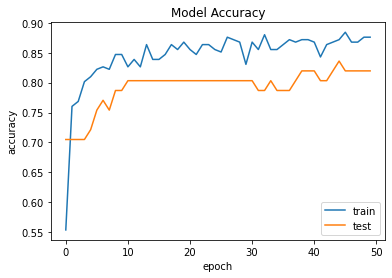

In [422]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

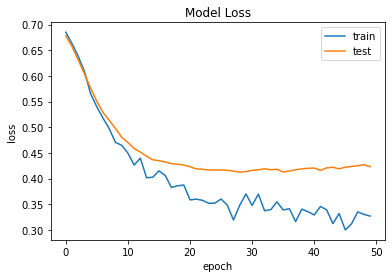

In [423]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 4.Improving Results - A Binary Classification Problem
Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.


In [394]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [425]:
Y_test_binary

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [427]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)
optimizer_adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

adamax =keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax",
)

In [433]:

model2 = Sequential()

model2.add(Dense(6,kernel_initializer='normal',activation='relu'))

model2.add(Dropout(0.3))
model2.add(Dense(3, kernel_initializer='normal', activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))
    
    
    
    ##compile model
model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



    

In [434]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25,restore_best_weights=True)

In [435]:
# fit the binary model on the training data
model2=model2.fit(x_train,Y_train_binary,validation_data=(x_test,Y_test_binary),epochs=500,batch_size=10,callbacks=[early_stop])

Epoch 1/500
25/25 [==============================] - 1s 5ms/step - loss: 0.6890 - accuracy: 0.5661 - val_loss: 0.6866 - val_accuracy: 0.5574
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6240 - val_loss: 0.6798 - val_accuracy: 0.6721
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6446 - val_loss: 0.6714 - val_accuracy: 0.7049
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7149 - val_loss: 0.6577 - val_accuracy: 0.6885
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6942 - val_loss: 0.6428 - val_accuracy: 0.7213
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6818 - val_loss: 0.6257 - val_accuracy: 0.7377
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7066 - val_loss: 0.6083 - val_accuracy: 0.7869
Epoch 8/500
2

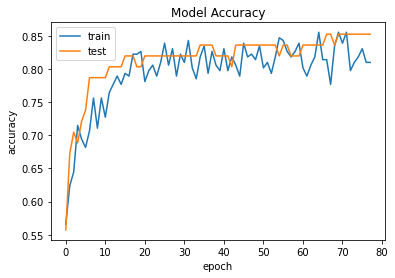

In [436]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

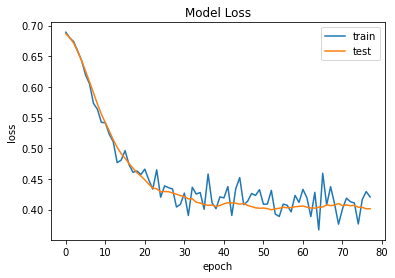

In [437]:
# Model Losss
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 5.Results and Metrics
The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model. To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [438]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(x_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 2ms/step
Results for Categorical Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [439]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(x_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 2ms/step
Results for Categorical Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

